In [281]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [273]:
df_train=pd.read_csv("../data/train.csv")
df_test=pd.read_csv("../data/test.csv")

## Analyzing data and columns

In [274]:
#Let's see what are the most dweling / type of houses

df_train_type=df_train.groupby(["MSSubClass"]).count()


df_train_type.rename(columns={"Id":"count"},inplace=True)
df_train_type=df_train_type[["count"]]
df_train_type

,count
MSSubClass,
20,536
30,69
40,4
45,12
50,144
60,299
70,60
75,16
80,58


#### Dwelling, the most dwelling / type of a house are houses with id 20,  1-STORY 1946 & NEWER ALL STYLES

<AxesSubplot:xlabel='MSSubClass'>

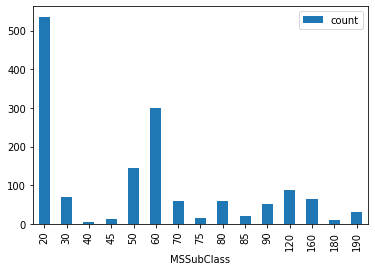

In [275]:
df_train_type.plot.bar()

## Clean Dataset

In [276]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### After looking at some of the missing values of the data, I realized that for Alley and PoolQC that null values are valuable information that we cannot discard or replaced, the fact that one of those area can affect the price of the house if all other features are the same

#### None the less, I will try the first model and preparation by taking out the features that I feel are the most important, clean them, process them, use some feature engineering techniques, build a model and then i will start adding new features

In [277]:
df_train_1=df_train[["LotArea","Neighborhood","Utilities","BldgType","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","TotalBsmtSF","KitchenQual","GarageQual","GarageCond","PoolQC"]]

In [284]:
X=pd.get_dummies(df_train_1)

X_lotArea=X[["LotArea"]]
scaler=StandardScaler()


In [280]:
y=df_train["SalePrice"]




,LotArea,OverallQual,OverallCond,TotalBsmtSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd
0,8450,7,5,856,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,9600,6,8,1262,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,11250,7,5,920,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,9550,7,5,756,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,14260,8,5,1145,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1456,13175,6,6,1542,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1457,9042,7,9,1152,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1458,9717,5,6,1078,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y)